<a href="https://colab.research.google.com/github/Karthik-Padavala/ml-physics/blob/code/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pickle

In [ ]:
path98 = '/content/drive/My Drive/rods98_data_correct/'
#path126 = '/content/drive/My Drive/rods126_data_correct/'
#path154 = '/content/drive/My Drive/rods154_data_correct/'
#path182 = '/content/drive/My Drive/rods182_data_correct/'

In [ ]:
d98 =  [0.5, 0.6, 0.7, 0.8, 1.10, 1.20, 1.30, 1.40]  #rods98_data2
#d126 = [0.5, 0.6, 0.7, 0.8, 0.9, 1.20, 1.30, 1.40, 1.50, 1.60]  #rods126_data
#d154 = [0.5, 0.6, 0.8, 0.9, 1.0, 1.30, 1.40, 1.50, 1.70, 1.80]  #rods154_data
#d182 = [0.5, 0.7, 0.8, 0.9, 1.0, 1.30, 1.40, 1.50, 1.60, 1.70]  #rods182_data3

In [ ]:
test_path98 = '/content/drive/My Drive/rods98_data_correct/test/'
#test_path126 = '/content/drive/My Drive/rod126_test/'
#test_path154 = '/content/drive/My Drive/rods154_test/'
#test_path182 = '/content/drive/My Drive/rods182_test/'

In [ ]:
te98 =  [0.8245, 0.8730, 0.9215, 0.9458, 0.9942, 1.0185, 1.0670, 1.1155]
t98 =  [0.5, 0.6, 0.7, 0.8, 1.10, 1.20, 1.30, 1.40]

In [ ]:
#NN
def data_to_lattice(path,L,d):
  lattice = np.zeros((12000,int(L)*int(L)))
  label = np.zeros((12000,))
  j = 0
  for i in d:
    datafile = open(path+'snapshot'+str("{:.2f}".format(i))+'.pickle','rb')
    data = pickle.load(datafile)
    datafile.close()
    lattice[j:j+1500] +=np.array(data).reshape((1500,9604))
    del data
    datafile = open(path+'label'+str("{:.2f}".format(i))+'.pickle','rb')
    labels = pickle.load(datafile)
    datafile.close()
    label[j:j+1500] += labels[:1500].reshape((1500,))
    j = j+1500
    print('mc=',"{:.4f}".format(i),"done")

  return lattice, label

In [ ]:
#CNN
def data_to_lattice(path,L,d):
  lattice = np.zeros((15000,int(L),int(L)))
  label = np.zeros((15000,1))
  j = 0
  for i in d:
    datafile = open(path+'snapshot'+str("{:.2f}".format(i))+'.pickle','rb')
    data = pickle.load(datafile)
    datafile.close()
    lattice[j:j+1500] +=data
    del data
    datafile = open(path+'label'+str("{:.2f}".format(i))+'.pickle','rb')
    labels = pickle.load(datafile)
    datafile.close()
    label[j:j+1500] += labels
    j = j+1500
    print('mc=',"{:.2f}".format(i),"done")

  return lattice, label

In [ ]:
def data_to_lattice_test(path,L,d):
  lattice = np.zeros((1600,int(L)*int(L)))
  label = np.zeros((1600,1))
  j = 0
  for i in d:
    datafile = open(path+'snapshot'+str("{:.2f}".format(i))+'.pickle','rb')
    data = pickle.load(datafile)
    datafile.close()
    lattice[j:j+200] +=np.array(data[:200]).reshape((200,9604))
    del data
    datafile = open(path+'label'+str("{:.2f}".format(i))+'.pickle','rb')
    labels = pickle.load(datafile)
    datafile.close()
    label[j:j+200] += labels[:200]
    j = j+200
    print('mc=',"{:.4f}".format(i),"done")

  return lattice, label

In [ ]:
test_lattice, test_label = data_to_lattice_test(test_path98,98,te98)

mc= 0.8245 done
mc= 0.8730 done
mc= 0.9215 done
mc= 0.9458 done
mc= 0.9942 done
mc= 1.0185 done
mc= 1.0670 done
mc= 1.1155 done


In [ ]:
test_lattice2, test_label2 = data_to_lattice_test(test_path98,98,t98)

mc= 0.5000 done
mc= 0.6000 done
mc= 0.7000 done
mc= 0.8000 done
mc= 1.1000 done
mc= 1.2000 done
mc= 1.3000 done
mc= 1.4000 done


In [ ]:
lattice, label = data_to_lattice(path98,98,d98)

mc= 0.5000 done
mc= 0.6000 done
mc= 0.7000 done
mc= 0.8000 done
mc= 1.1000 done
mc= 1.2000 done
mc= 1.3000 done
mc= 1.4000 done


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation,Conv2D, MaxPooling2D, Dropout
from tensorflow import keras

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(lattice,label,test_size=0.15)

In [ ]:
model = Sequential()
model.add(Dense(1000,input_shape=(9604,),activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dense(1600,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dense(1000,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
#model.add(Dense(200,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#,kernel_regularizer=keras.regularizers.l2(0.005)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1000)              9605000   
_________________________________________________________________
dense_22 (Dense)             (None, 1600)              1601600   
_________________________________________________________________
dense_23 (Dense)             (None, 1000)              1601000   
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 1001      
Total params: 12,808,601
Trainable params: 12,808,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,batch_size=128,epochs=0,validation_split=0.15)

Epoch 1/10
68/68 [==============================] - 14s 210ms/step - loss: 3.6489 - accuracy: 1.0000 - val_loss: 4.0866 - val_accuracy: 0.8314
Epoch 2/10
68/68 [==============================] - 15s 214ms/step - loss: 3.6389 - accuracy: 1.0000 - val_loss: 4.0764 - val_accuracy: 0.8307
Epoch 3/10
68/68 [==============================] - 15s 215ms/step - loss: 3.6290 - accuracy: 1.0000 - val_loss: 4.0729 - val_accuracy: 0.8301
Epoch 4/10
68/68 [==============================] - 15s 215ms/step - loss: 3.6191 - accuracy: 1.0000 - val_loss: 4.0686 - val_accuracy: 0.8261
Epoch 5/10
68/68 [==============================] - 15s 215ms/step - loss: 3.6093 - accuracy: 1.0000 - val_loss: 4.0509 - val_accuracy: 0.8320
Epoch 6/10
68/68 [==============================] - 15s 218ms/step - loss: 3.5995 - accuracy: 1.0000 - val_loss: 4.0435 - val_accuracy: 0.8314
Epoch 7/10
68/68 [==============================] - 15s 215ms/step - loss: 3.5897 - accuracy: 1.0000 - val_loss: 4.0277 - val_accuracy: 0.8346

In [ ]:
model.evaluate(X_test,Y_test)

57/57 [==============================] - 2s 39ms/step - loss: 4.1925 - accuracy: 0.8150


[4.1924543380737305, 0.8149999976158142]

In [ ]:
i = 0
while(i<1600):
  print(model.evaluate(test_lattice[i:i+200],test_label[i:i+200]))
  i += 200

7/7 [==============================] - 0s 34ms/step - loss: 4.6430 - accuracy: 0.6000
[4.643026828765869, 0.6000000238418579]
7/7 [==============================] - 0s 32ms/step - loss: 5.0139 - accuracy: 0.5500
[5.013908863067627, 0.550000011920929]
7/7 [==============================] - 0s 33ms/step - loss: 5.5253 - accuracy: 0.4600
[5.52534294128418, 0.46000000834465027]
7/7 [==============================] - 0s 35ms/step - loss: 5.4907 - accuracy: 0.4350
[5.490711212158203, 0.4350000023841858]
7/7 [==============================] - 0s 34ms/step - loss: 4.6600 - accuracy: 0.6150
[4.660024166107178, 0.6150000095367432]
7/7 [==============================] - 0s 34ms/step - loss: 4.5915 - accuracy: 0.6200
[4.591546535491943, 0.6200000047683716]
7/7 [==============================] - 0s 35ms/step - loss: 4.4924 - accuracy: 0.6550
[4.492369651794434, 0.6549999713897705]
7/7 [==============================] - 0s 33ms/step - loss: 4.1522 - accuracy: 0.7750
[4.152163505554199, 0.77499997615

In [ ]:
i = 0
while(i<1600):
  print(model.evaluate(test_lattice2[i:i+200],test_label2[i:i+200]))
  i += 200

7/7 [==============================] - 0s 34ms/step - loss: 3.8483 - accuracy: 0.8650
[3.848301887512207, 0.8650000095367432]
7/7 [==============================] - 0s 39ms/step - loss: 3.9608 - accuracy: 0.8400
[3.960843563079834, 0.8399999737739563]
7/7 [==============================] - 0s 35ms/step - loss: 4.2155 - accuracy: 0.7500
[4.215517997741699, 0.75]
7/7 [==============================] - 0s 33ms/step - loss: 4.6630 - accuracy: 0.6850
[4.6629743576049805, 0.6850000023841858]
7/7 [==============================] - 0s 32ms/step - loss: 4.1055 - accuracy: 0.7800
[4.1055498123168945, 0.7799999713897705]
7/7 [==============================] - 0s 34ms/step - loss: 3.9217 - accuracy: 0.8450
[3.9216504096984863, 0.8450000286102295]
7/7 [==============================] - 0s 34ms/step - loss: 3.8141 - accuracy: 0.9100
[3.8141417503356934, 0.9100000262260437]
7/7 [==============================] - 0s 32ms/step - loss: 3.7378 - accuracy: 0.9250
[3.737797737121582, 0.925000011920929]


In [ ]:
model.save('retrained_DNN.h5')

In [ ]:
model.evaluate(X_test,Y_test)

In [ ]:
new_model = Sequential()
new_model.add(Conv2D(filters=4,input_shape=(154,154,1),kernel_size=(3,3),activation='relu',kernel_regularizer=keras.regularizers.l2(0.1)))#previously l2=0.05
new_model.add(MaxPooling2D(pool_size=(2,2),strides=2))
new_model.add(Conv2D(filters=4,kernel_size=(3,3),activation='relu',kernel_regularizer=keras.regularizers.l2(0.075)))
new_model.add(MaxPooling2D(pool_size=(2,2),strides=2))
new_model.add(Flatten())
new_model.add(Dropout(0.3)) #used to be 0.3 for rods first case
new_model.add(Dense(256,activation='relu'))
new_model.add(Dense(128,activation='relu'))
new_model.add(Dense(1,activation='sigmoid'))

In [ ]:
new_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
X_train = np.expand_dims(X_train,axis=3)
X_test = np.expand_dims(X_test,axis=3)

In [ ]:
new_model.fit(X_train,Y_train,validation_split=0.15,batch_size=128,epochs=10)

Epoch 1/10
85/85 [==============================] - 87s 1s/step - loss: 1.0089 - accuracy: 0.6785 - val_loss: 0.5912 - val_accuracy: 0.9697
Epoch 2/10
85/85 [==============================] - 86s 1s/step - loss: 0.4940 - accuracy: 0.9562 - val_loss: 0.4332 - val_accuracy: 0.9760
Epoch 3/10
85/85 [==============================] - 86s 1s/step - loss: 0.4276 - accuracy: 0.9718 - val_loss: 0.4553 - val_accuracy: 0.9582
Epoch 4/10
85/85 [==============================] - 86s 1s/step - loss: 0.4089 - accuracy: 0.9742 - val_loss: 0.3876 - val_accuracy: 0.9822
Epoch 5/10
85/85 [==============================] - 86s 1s/step - loss: 0.4030 - accuracy: 0.9731 - val_loss: 0.4690 - val_accuracy: 0.9394
Epoch 6/10
85/85 [==============================] - 87s 1s/step - loss: 0.4101 - accuracy: 0.9665 - val_loss: 0.3867 - val_accuracy: 0.9775
Epoch 7/10
85/85 [==============================] - 86s 1s/step - loss: 0.3623 - accuracy: 0.9861 - val_loss: 0.3700 - val_accuracy: 0.9807
Epoch 8/10
85/85 [==

In [ ]:
new_model.evaluate(X_test,Y_test)

71/71 [==============================] - 8s 114ms/step - loss: 0.3662 - accuracy: 0.9751


[0.366166353225708, 0.9751111268997192]

Testing

0.99 for first 4 mc values 0.902, 0.868, 0.95, 0.997 for next 3 mc values

0.997 for first 5 mc values and 0.992 for last 5 mc values for mc=1.2 is 0.964 and for mc=0.9 is 0.98 for 14 epochs 126x126

last 5 mc values 0.999 and first five 0.999  mc= 1.1 is 0.933 mc=1.3 is 0.994 for 10 epochs with test accuracy of 0.984 182x182

1.0, 1.0, 1.0, 1.0, 1.0, 0.993, 0.902, 0.992, 1.0, 1.0, 1.0, 1.0 with data of 1500 at each mc 6 epochs for test accuarcy of 0.97 182x182

0.999 till 5 mc values then 0.9266 and the 0.865 and for rest of the 5 values it is 0.994 for test accuaracy of 0.96 182x182

1.0, 1.0, 1.0, 1.0, 0.998, 0.952, 0.993, 0.998, 1.0, 1.0, 1.0, 1.0 for 14 epochs and test accuracy of 98.7 182x182

In [ ]:
model.evaluate(np.expand_dims(lattice,axis=3),label)

18000/18000 [==============================] - 90s 5ms/step


[0.11974176067113876, 0.9906666874885559]

In [ ]:
i = 0
while i<15000:
  print(model.evaluate(np.expand_dims(lattice[i:i+1500],axis=3),label[i:i+1500]))
  i = i+1500

1500/1500 [==============================] - 2s 2ms/step
[0.10690270827213923, 1.0]
1500/1500 [==============================] - 2s 2ms/step
[0.11214572930335999, 0.9993333220481873]
1500/1500 [==============================] - 2s 2ms/step
[0.1238351040283839, 1.0]
1500/1500 [==============================] - 2s 2ms/step
[0.1839356943766276, 0.9833333492279053]
1500/1500 [==============================] - 2s 2ms/step
[0.3507626207669576, 0.9100000262260437]
1500/1500 [==============================] - 2s 2ms/step
[0.6010294237136841, 0.7586666941642761]
1500/1500 [==============================] - 2s 2ms/step
[0.2832564279238383, 0.9319999814033508]
1500/1500 [==============================] - 2s 2ms/step
[0.15857131679852804, 0.9893333315849304]
1500/1500 [==============================] - 2s 2ms/step
[0.11817771236101786, 1.0]
1500/1500 [==============================] - 2s 2ms/step
[0.11131287799278895, 1.0]


In [ ]:
#test_lattice98, test_label98 = testdata_to_lattice(test_path98, 98, te98)
#test_lattice126, test_label126 = testdata_to_lattice(test_path126, 126, te126)
#test_lattice154, test_label154 = testdata_to_lattice(test_path154, 154, te154)
test_lattice182, test_label182 = testdata_to_lattice(test_path182, 182, te182)

mc= 0.50 done
mc= 0.70 done
mc= 0.80 done
mc= 0.90 done
mc= 1.00 done
mc= 1.30 done
mc= 1.40 done
mc= 1.50 done
mc= 1.60 done
mc= 1.70 done


In [ ]:
from keras.models import load_model
model98 = load_model('/content/drive/My Drive/new_models/model_data98newbetter.h5')
#model126 = load_model('/content/drive/My Drive/new_models/model_data126newbetter.h5')
#model154 = load_model('/content/drive/My Drive/new_models/model_data154newbetter.h5')
#model182 = load_model('/content/drive/My Drive/new_models/model_data182newbetter.h5')

In [ ]:
np.sum(label[6000:])

6000.0

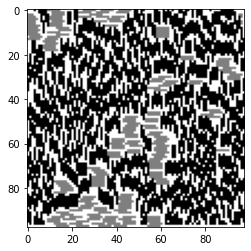

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(lattice[11000],cmap='binary', vmin=0, vmax=2)

In [ ]:
i = 0
while i<1600:
  print(model98.evaluate(np.expand_dims(test_lattice[i:i+200],axis=3),test_label[i:i+200]))
  i = i+200

1500/1500 [==============================] - 3s 2ms/step
[0.04470771923661232, 1.0]
1500/1500 [==============================] - 2s 2ms/step
[0.04470771923661232, 1.0]
1500/1500 [==============================] - 2s 2ms/step
[0.04470771923661232, 1.0]
1500/1500 [==============================] - 2s 2ms/step
[0.04470771923661232, 1.0]
1500/1500 [==============================] - 2s 2ms/step
[25.39211208597819, 0.0]
1500/1500 [==============================] - 2s 2ms/step
[22.36559679667155, 0.0]
1500/1500 [==============================] - 2s 2ms/step
[19.253440424601237, 0.0]
1500/1500 [==============================] - 2s 2ms/step
[16.139650319417317, 0.0]


In [ ]:
i = 0
while i<12000:
  print(model98.evaluate(np.expand_dims(lattice[i:i+1500],axis=3),label[i:i+1500]))
  i = i+1500

1500/1500 [==============================] - 3s 2ms/step
[0.04472081137696902, 1.0]
1500/1500 [==============================] - 2s 2ms/step
[0.04503784480690956, 1.0]
1500/1500 [==============================] - 2s 2ms/step
[0.0523089861869812, 0.9973333477973938]
1500/1500 [==============================] - 2s 2ms/step
[0.09480839227636655, 0.9833333492279053]
1500/1500 [==============================] - 2s 2ms/step
[0.22430528656641643, 0.9459999799728394]
1500/1500 [==============================] - 2s 2ms/step
[0.0969042489528656, 0.9779999852180481]
1500/1500 [==============================] - 2s 2ms/step
[0.052867242654164634, 0.9973333477973938]
1500/1500 [==============================] - 2s 2ms/step
[0.045242011904716495, 1.0]


In [ ]:
print(np.shape(test_lattice154), np.shape(test_label154), np.sum(test_label154[:400]), np.sum(test_label154[400:]))

(800, 154, 154) (800, 1) 0.0 400.0


In [ ]:
i = 0
while i<1600:
  print(model98.evaluate(np.expand_dims(test_lattice98[i:i+200],axis=3),test_label98[i:i+200]))
  i = i+200

200/200 [==============================] - 1s 3ms/step
[0.044737980365753174, 1.0]
200/200 [==============================] - 0s 2ms/step
[0.04936532124876976, 1.0]
200/200 [==============================] - 0s 2ms/step
[0.061259987950325015, 0.9950000047683716]
200/200 [==============================] - 0s 2ms/step
[0.19987156093120576, 0.9549999833106995]
200/200 [==============================] - 0s 2ms/step
[0.6732157319784164, 0.7799999713897705]
200/200 [==============================] - 0s 2ms/step
[0.1944758725166321, 0.9399999976158142]
200/200 [==============================] - 0s 2ms/step
[0.05070711821317673, 1.0]
200/200 [==============================] - 0s 2ms/step
[0.04561762288212776, 1.0]


0.839, 0.785, 0.759, 0.899

In [ ]:
i = 0
while i<800:
  print(model.evaluate(np.expand_dims(test_lattice126[i:i+200],axis=3),test_label126[i:i+200]))
  i = i+200

200/200 [==============================] - 1s 3ms/step
[1.0605039596557617, 0.9950000047683716]
200/200 [==============================] - 1s 3ms/step
[1.0626605987548827, 0.9900000095367432]
200/200 [==============================] - 1s 3ms/step
[0.7103313326835632, 0.3499999940395355]
200/200 [==============================] - 1s 3ms/step
[0.5129826474189758, 0.5400000214576721]


In [ ]:
i = 0
while i<800:
  print(model.evaluate(np.expand_dims(test_lattice126[i:i+200],axis=3),test_label126[i:i+200]))
  i = i+200

200/200 [==============================] - 1s 3ms/step
[0.3374271297454834, 0.9350000023841858]
200/200 [==============================] - 0s 2ms/step
[0.5095314288139343, 0.8349999785423279]
200/200 [==============================] - 1s 3ms/step
[0.5489773297309876, 0.824999988079071]
200/200 [==============================] - 0s 2ms/step
[0.2907492297887802, 0.9300000071525574]


In [ ]:
i = 0
while i<800:
  print(model154.evaluate(np.expand_dims(test_lattice154[i:i+200],axis=3),test_label154[i:i+200]))
  i = i+200

200/200 [==============================] - 1s 4ms/step
[0.20760836839675903, 0.9800000190734863]
200/200 [==============================] - 1s 4ms/step
[0.32758854746818544, 0.9150000214576721]
200/200 [==============================] - 1s 4ms/step
[0.3225028026103973, 0.9150000214576721]
200/200 [==============================] - 1s 4ms/step
[0.18963267982006074, 0.9750000238418579]


In [ ]:
i = 0
while i<2000:
  print(model182.evaluate(np.expand_dims(test_lattice182[i:i+200],axis=3),test_label182[i:i+200]))
  i = i+200

200/200 [==============================] - 1s 6ms/step
[0.11746769338846207, 1.0]
200/200 [==============================] - 1s 5ms/step
[0.11747073858976365, 1.0]
200/200 [==============================] - 1s 5ms/step
[0.11749642372131347, 1.0]
200/200 [==============================] - 1s 5ms/step
[0.11846331477165223, 1.0]
200/200 [==============================] - 1s 5ms/step
[0.21198050379753114, 0.9700000286102295]
200/200 [==============================] - 1s 5ms/step
[0.15495847672224045, 0.9950000047683716]
200/200 [==============================] - 1s 5ms/step
[0.11806103318929673, 1.0]
200/200 [==============================] - 1s 5ms/step
[0.1175066214799881, 1.0]
200/200 [==============================] - 1s 5ms/step
[0.11746854215860367, 1.0]
200/200 [==============================] - 1s 5ms/step
[0.1174692901968956, 1.0]


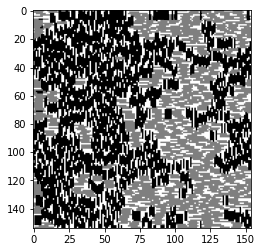

In [ ]:
plt.imshow(test_lattice[450],cmap='binary',vmin=0,vmax=2)

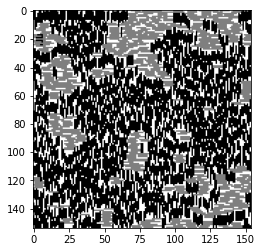

In [ ]:
2eplt.imshow(test_lattice[690],cmap='binary',vmin=0,vmax=2)

In [ ]:
model.save('model_data98newbetter.h5')

In [ ]:
from keras.models import load_model
new_model = load_model('/content/model_data98newbetter.h5')

OSError: ignored

In [ ]:
i = 0
while i<800:
  print(new_model.evaluate(np.expand_dims(test_lattice98[i:i+200],axis=3),test_label98[i:i+200]))
  i = i+200

200/200 [==============================] - 0s 2ms/step
[0.35447196125984193, 0.8849999904632568]
200/200 [==============================] - 0s 2ms/step
[0.6838470268249511, 0.7250000238418579]
200/200 [==============================] - 0s 2ms/step
[0.7585494184494018, 0.7149999737739563]
200/200 [==============================] - 0s 2ms/step
[0.41985146939754486, 0.8799999952316284]


In [ ]:
!pip install pyyaml h5py

In [ ]:
model.evaluate(np.expand_dims(lattice[7500:9000],axis=3),label[7500:9000])

1500/1500 [==============================] - 8s 5ms/step


[0.1153181246916453, 0.9933333396911621]

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 152, 152, 4)       40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 76, 76, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 4)         148       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5476)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5476)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              